# Ising 2D 
## Simulaciones Montecarlo , Algoritmo de Metropolis

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random

###   Definimos los parámetros del sistema

In [166]:
L = 50  # Tamaño del sistema (LxL)
J = 1  # Energía de interacción entre espines
T = 1.7  # Temperatura
num_pasos = 1000

### Definición de funciones básicas

In [111]:
def calcular_energia(spins):
    energia = 0
    for i in range(L):
        for j in range(L):
            energia += -J * spins[i, j] * (spins[(i + 1) % L, j] +spins[(i - 1) % L, j]+ spins[i, (j + 1) % L]+spins[i, (j - 1) % L])
    return energia

def lista_aleatorios(L):
    lista = [0]*(L**2)
    for i in range(L**2):
        lista[i] = random.randint(0,L**2-1)
    return lista

def site_assign(N_i,L):
    i = int(N_i/L)
    j= N_i%L
    return i,j

def metropolis(spins,temperatura,n):
    i, j = site_assign(n,L)
    s = spins[i, j]
    suma_vecinos = (spins[(i + 1) % L, j] + spins[(i - 1) % L, j] + spins[i, (j + 1) % L] + spins[i, (j - 1) % L])
    delta_energia = 2 * J * s * suma_vecinos
    if delta_energia < 0:  
        spins[i, j] *= -1
    elif random.random() < np.exp(-delta_energia / temperatura):
        spins[i, j] *= -1
    return spins

def mag(T):
    if T > 2/np.log(1+np.sqrt(2)):
        return(0)
    else:
        return((1-(np.sinh(2/T))**(-4))**(1/8))
    
def calcular_magnetizacion(spins):
    return np.sum(spins) / (L * L)

### Condiciones iniciales 

In [112]:
#spins = np.random.choice([-1, 1], size=(L, L))
spins = np.ones((L, L))
magnetizacion = []
energias = []

In [113]:
for paso in range(num_pasos):
    N = lista_aleatorios(L)
    energia = calcular_energia(spins)
    magnetizacion1 = calcular_magnetizacion(spins)
    for k in range(len(N)):
        metropolis(spins,T,N[k])
    energias.append(energia)
    magnetizacion.append(magnetizacion1)

####  Graficadores

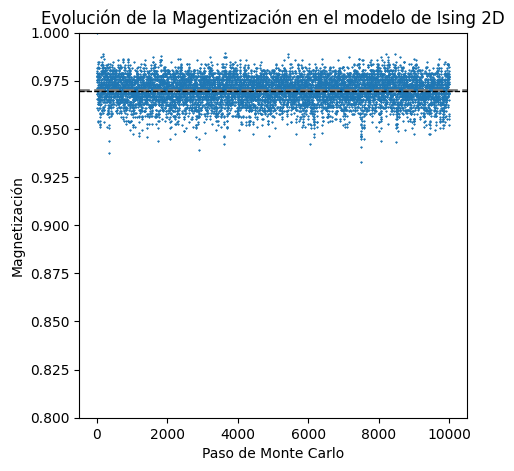

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(magnetizacion,'*',markersize=1)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Magnetización')
plt.ylim([0.8,1.0])
plt.axhline(mag(T), color='grey',linestyle='--',linewidth=2)
plt.title('Evolución de la Magentización en el modelo de Ising 2D')
plt.show()

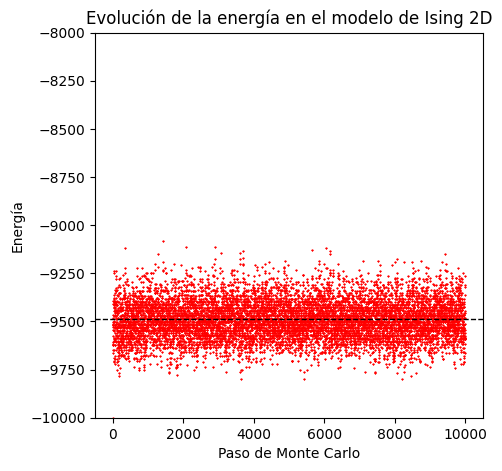

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(energias,'r*',markersize=1)
plt.xlabel('Paso de Monte Carlo')
plt.ylabel('Energía')
plt.ylim([-10000,-8000])
plt.title('Evolución de la energía en el modelo de Ising 2D')
plt.show()

### Segunda parte 
#### Encontrar la magnetización y energía en función de la temperatura T

definimos los parametros de entrada

In [173]:
Tempstep = 40    # pasos de temperatura
Tempinit =  1.2    # temperatura inicial
Tempfin = 3.2       # temperatura final
TT = np.linspace(Tempinit,Tempfin,Tempstep)
E,M= np.zeros(Tempstep), np.zeros(Tempstep)

In [175]:
for t in range(Tempstep):
    #spins = np.random.choice([-1, 1], size=(L, L))
    spins = np.ones((L, L))
    magnetizacion = []
    energias = []
    for paso in range(num_pasos):
        N = lista_aleatorios(L)
        energia = calcular_energia(spins)
        magnetizacion1 = calcular_magnetizacion(spins)
        for k in range(len(N)):
            metropolis(spins,TT[t],N[k])
        energias.append(energia)
        magnetizacion.append(magnetizacion1)
    energiascal = energias[int(len(energias)*0.2):]
    magnetizacioncal = magnetizacion[int(len(magnetizacion)*0.2):]
    meanenergy = np.mean(energiascal)
    meanmagnetizacion = np.mean(magnetizacioncal)
    E[t] =  meanenergy
    M[t] =  meanmagnetizacion

    
    

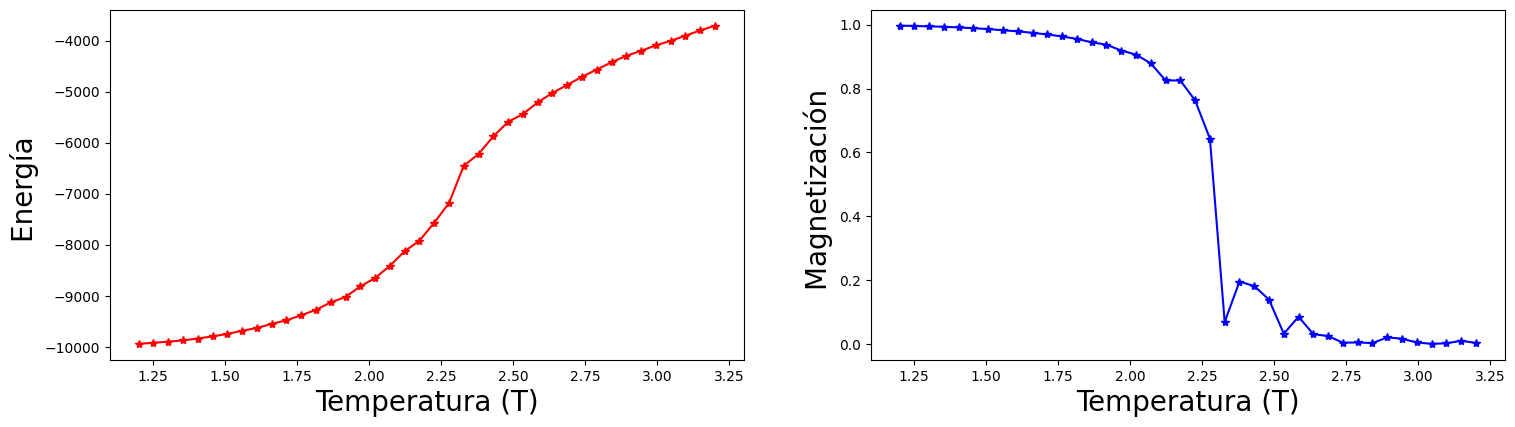

In [189]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.plot(TT, E, 'r*-')
plt.xlabel("Temperatura (T)", fontsize=20);
plt.ylabel("Energía ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.plot(TT, abs(M), 'b*-')
plt.xlabel("Temperatura (T)", fontsize=20); 
plt.ylabel("Magnetización ", fontsize=20);   plt.axis('tight');
